In [1]:
import sys
sys.path.append('../../')

In [2]:
import datas.income2023f as income2023f

Loading Data
Finished Loading Data


In [3]:
import sklearn
import numpy as np

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [5]:
def preprocess(df):
    df = df.copy()
    return_y = False
    if 'income>50K' in df.columns:
        return_y = True
        y = np.array(list(df['income>50K']))
    df.drop(columns=['ID', 'income>50K'], inplace=True, errors='ignore')
    
    ret = [] #np.zeros(shape=[len(df), len(df.columns)], dtype=np.float32)
    
    for i, row in df.iterrows():
        dp = [
            row.age,
            *row.workclass,
            # row.fnlwgt,
            *row.education,
            row['education.num'],
            *row['marital.status'],
            *row.occupation,
            # *row.relationship,
            *row.race,
            *row.sex,
            row['capital.gain'],
            row['capital.loss'],
            row['hours.per.week'],
            *row['native.country']
        ]
        # dp.extend(np.multiply(dp, dp))
        # dp.extend(np.cos(dp))
        ret.append(dp)
    
    if return_y:
        return np.array(ret), y
    return np.array(ret)

In [6]:
train, train_y = preprocess(income2023f.train_preprocessed.iloc[income2023f.train_training_partition])
validation, validation_y = preprocess(income2023f.train_preprocessed.iloc[income2023f.train_valdiation_partition])

In [7]:
# C_range = np.logspace(-2, 10, 3)
# gamma_range = np.logspace(-9, 3, 3)
# param_grid = dict(gamma=gamma_range, C=C_range)
# cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
mlp = make_pipeline(
    StandardScaler(),
    MLPClassifier(
        solver='adam',
        alpha=0,
        hidden_layer_sizes=(100,100),
        verbose=True,
        early_stopping=True
    )
)
# grid = GridSearchCV(svc, param_grid=param_grid, cv=cv)

In [8]:
train_y.shape

(20000,)

In [9]:
# grid.fit(train, train_y)
# print(
#     "The best parameters are %s with a score of %0.2f"
#     % (grid.best_params_, grid.best_score_)
# )
mlp.fit(train, train_y)

Iteration 1, loss = 0.40602647
Validation score: 0.849000
Iteration 2, loss = 0.32933574
Validation score: 0.861000
Iteration 3, loss = 0.31619799
Validation score: 0.863000
Iteration 4, loss = 0.30769149
Validation score: 0.857000
Iteration 5, loss = 0.30154659
Validation score: 0.857500
Iteration 6, loss = 0.29722547
Validation score: 0.864500
Iteration 7, loss = 0.29253092
Validation score: 0.857000
Iteration 8, loss = 0.28923203
Validation score: 0.857500
Iteration 9, loss = 0.28623560
Validation score: 0.857500
Iteration 10, loss = 0.28251225
Validation score: 0.864000
Iteration 11, loss = 0.28121266
Validation score: 0.864500
Iteration 12, loss = 0.27726143
Validation score: 0.857500
Iteration 13, loss = 0.27568310
Validation score: 0.859500
Iteration 14, loss = 0.27293217
Validation score: 0.857000
Iteration 15, loss = 0.26943086
Validation score: 0.856500
Iteration 16, loss = 0.26845528
Validation score: 0.856000
Iteration 17, loss = 0.26702897
Validation score: 0.859000
Valida

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=0, early_stopping=True,
                               hidden_layer_sizes=(100, 100), verbose=True))])

(20000,) (20000,)


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

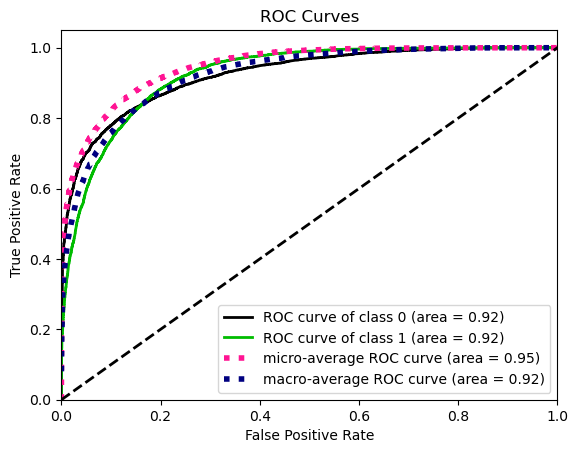

In [10]:
train_pred = mlp.predict_proba(train)[:,1]
print(train_y.shape, train_pred.shape)
import scikitplot as skplt
skplt.metrics.plot_roc(
    train_y,
    np.array([
        1-train_pred,
        train_pred
    ]).T
)

(5000,) (5000,)


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

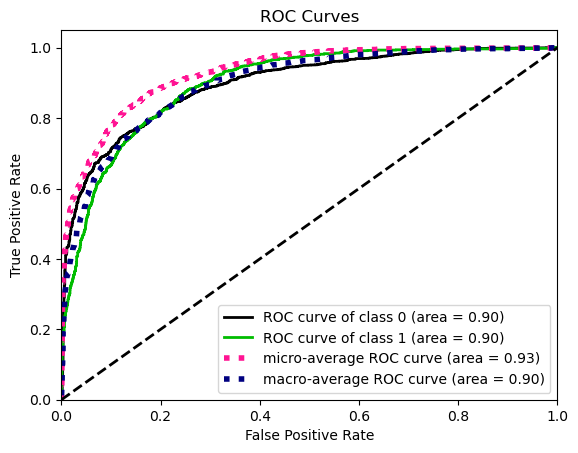

In [11]:
validation_pred = mlp.predict_proba(validation)[:,1]
print(validation_y.shape, validation_pred.shape)
import scikitplot as skplt
skplt.metrics.plot_roc(
    validation_y,
    np.array([
        1-validation_pred,
        validation_pred
    ]).T
)

# Now, train on full data with equivalent hyperparameters

Iteration 1, loss = 0.46757198
Iteration 2, loss = 0.37096458
Iteration 3, loss = 0.35531993
Iteration 4, loss = 0.34549051
Iteration 5, loss = 0.33764924
Iteration 6, loss = 0.33223396
Iteration 7, loss = 0.32642049
Iteration 8, loss = 0.32237796
Iteration 9, loss = 0.31880186
Iteration 10, loss = 0.31640399
Iteration 11, loss = 0.31434960
Iteration 12, loss = 0.31029176
Iteration 13, loss = 0.30853378
Iteration 14, loss = 0.30704440
Iteration 15, loss = 0.30479319
Iteration 16, loss = 0.30293723
Iteration 17, loss = 0.30134423
Iteration 18, loss = 0.30071881
Iteration 19, loss = 0.29791741


/Users/charlesstrauss/CS6350project/envs/ML/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (19) reached and the optimization hasn't converged yet.
  warnings.warn(


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

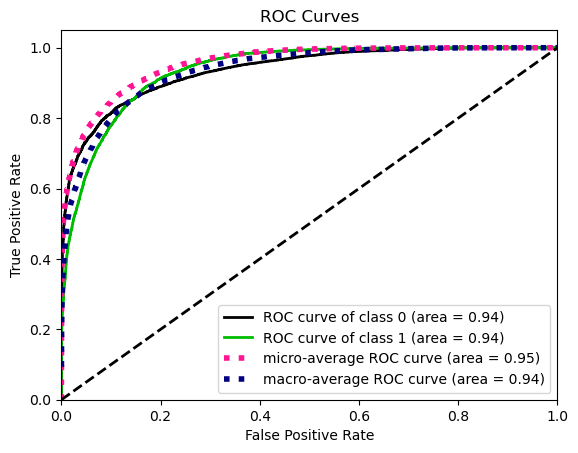

In [12]:
train_full, train_full_y = preprocess(income2023f.train_preprocessed)
mlp_full = make_pipeline(
    StandardScaler(),
    MLPClassifier(
        solver='adam',
        alpha=0.1,
        hidden_layer_sizes=(100,100),
        verbose=True,
        # early_stopping=True
        max_iter=19
    )
)
mlp_full.fit(train_full, train_full_y)
train_full_pred = mlp_full.predict_proba(train_full)[:,1]
skplt.metrics.plot_roc( # ensure nothing terrible happened, not useful roc
    train_full_y,
    np.array([
        1-train_full_pred,
        train_full_pred
    ]).T
)

In [13]:
test = preprocess(income2023f.test_preprocessed)
test_pred = mlp_full.predict_proba(test)[:,1]

In [14]:
import pandas as pd
pd.DataFrame(
    {
        'ID': list(range(1, 23843)),
        'Prediction':test_pred
    }
).to_csv('./mlp_test_predictions.csv', index=False)

In [16]:
me = preprocess(income2023f.preprocess(pd.DataFrame(
    {'age': [21],
     'workclass':['Without-pay'],
     'fnlwgt': 0,
     'education':['Some-college'],
     'education.num':[10],
     'marital.status':['Never-married'],
     'occupation':['Tech-support'],
     'relationship':['Unmarried'],
     'race':['White'],
     'sex':['Male'],
     'capital.gain':[0],
     'capital.loss':[30000],
     'hours.per.week':[80],
     'native.country': ['United-States']
    }
)))
me

array([[2.1e+01, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 1.0e+01, 0.0e+00,
        0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 1.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 1.0e+00,
        0.0e+00, 3.0e+04, 8.0e+01, 1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
      

In [17]:
mlp_full.predict(me)

array([1])